In [1]:
import pandas as pd 
import numpy as np

import gc
import time
import warnings

from scipy import sparse
import scipy.stats as ss

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


from nltk.tokenize import TweetTokenizer   


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


import  textblob
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk

from textblob import Word 


start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

/Users/yashsinghai/anaconda2/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yashsinghai/anaconda2/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yashsinghai/anaconda2/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yashsinghai/anaconda2/envs/py3

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

In [4]:
job_post_data = pd.read_csv('data job posts.csv')
job_post_data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [5]:
job_post_data.shape

(19001, 24)

In [6]:
job_post_data.drop_duplicates(keep = 'first', inplace = True)

In [7]:
job_post_data.shape

(18962, 24)

In [8]:
job_post_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18962 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           18962 non-null  object
 1   date              18962 non-null  object
 2   Title             18934 non-null  object
 3   Company           18955 non-null  object
 4   AnnouncementCode  1206 non-null   object
 5   Term              7664 non-null   object
 6   Eligibility       4918 non-null   object
 7   Audience          638 non-null    object
 8   StartDate         9653 non-null   object
 9   Duration          10775 non-null  object
 10  Location          18930 non-null  object
 11  JobDescription    15076 non-null  object
 12  JobRequirment     16449 non-null  object
 13  RequiredQual      18481 non-null  object
 14  Salary            9604 non-null   object
 15  ApplicationP      18902 non-null  object
 16  OpeningDate       18258 non-null  object
 17  Deadline    

In [9]:
job_post_data.isnull().sum()

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17756
Term                11298
Eligibility         14044
Audience            18324
StartDate            9309
Duration             8187
Location               32
JobDescription       3886
JobRequirment        2513
RequiredQual          481
Salary               9358
ApplicationP           60
OpeningDate           704
Deadline               65
Notes               16758
AboutC               6523
Attach              17406
Year                    0
Month                   0
IT                      0
dtype: int64

# --------------------- Business Questions ----------------------

#### 1. Job Nature and Company Profiles: 
What are the types of jobs that are in demand in Armenia? How are the job natures changing over time? 

On the business question of Job Nature and Company Profiles. Unsupervised learning techniques, such as topic modelling and other techniques such as term frequency counting will be applied to the data, including time period segmented dataset. Qualitative assessment will be done on the results to help us understand the job postings.

#### 2. Desired Characteristics and Skill-Sets:
What are the desired characteristics and skill-set of the candidates based on the job description dataset? How these are desired characteristics changing over time?

To understand the desired characteristics and skill-sets demanded by employers in the job ads, unsupervisedlearningmethodssuchasK-meansclusteringwillbeusedafterappropriatedimension reduction.

#### 3. IT Job Classification: 
Build a classifier that can tell us from the job description and company description whether a job is IT or not, so that this column can be automatically populated for new job postings. After doing so, understand what important factors are which drives this classification.

For the IT Job classification business question, you should aim to create supervised learning classification models that are able to classify based on the job text data accurately, is it an IT job.

#### 4. Similarity of Jobs: 
Given a job title, find the 5 top jobs that are of a similar nature, based on the job post.


# ------------------------------------------------------------------------

In [10]:
job_post_data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [11]:
job_data = job_post_data[['jobpost', 'Title', 'Company', 'JobDescription', 'JobRequirment', 'RequiredQual', 'Year', 'Month', 'AboutC', 'IT']]

In [12]:
job_data.head()

,jobpost,Title,Company,JobDescription,JobRequirment,RequiredQual,Year,Month,AboutC,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",2004,1,NaN,False
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,2004,1,The International Research & Exchanges Board (...,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",2004,1,The Caucasus Environmental NGO Network is a\nn...,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",2004,1,NaN,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,Yerevan Brandy Company,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,2004,1,NaN,True


In [13]:
job_data.shape

(18962, 10)

In [14]:
def missing_imputation(x) :
    x = x.fillna(x.mode())
    return x

In [15]:
job_data.isnull().sum()

jobpost              0
Title               28
Company              7
JobDescription    3886
JobRequirment     2513
RequiredQual       481
Year                 0
Month                0
AboutC            6523
IT                   0
dtype: int64

In [16]:
job_data['RequiredQual'].mode()[0]

'- Excellent communication skills;\n- Good oral and written communication skills in Armenian and English\nlanguages, knowledge of Russian language is a plus;\n- Basic computer and internet/ e-mail skills;\n- Punctual, communicative, open-minded, self-confident, eager to learn &\nflexible;\n- Ability to complete the tasks in a timely manner.'

In [17]:
for i in ['Title', 'Company', 'JobDescription', 'JobRequirment', 'RequiredQual', 'AboutC'] : 
    job_data[i] = job_data[i].fillna(job_data[i].mode()[0])

In [18]:
job_data.isnull().sum()

jobpost           0
Title             0
Company           0
JobDescription    0
JobRequirment     0
RequiredQual      0
Year              0
Month             0
AboutC            0
IT                0
dtype: int64

In [19]:
classes = job_data['Title'].value_counts()[:21]
keys = classes.keys().to_list()

job_data = job_data[job_data['Title'].isin(keys)]
job_data['Title'].value_counts()

Accountant                                356
Chief Accountant                          219
Medical Representative                    216
Sales Manager                             164
Administrative Assistant                  155
Lawyer                                    151
Software Developer                        134
Project Manager                           117
English Language Courses                  107
Web Developer                             101
Java Developer                             88
Marketing Specialist                       87
Office Manager                             85
Receptionist/ Administrative Assistant     76
System Administrator                       75
Graphic Designer                           75
Marketing Manager                          72
Senior Java Developer                      69
Software Engineer                          68
QA Engineer                                66
PHP Developer                              64
Name: Title, dtype: int64

### IT Classification using supervised techniques : 

In [20]:
job_data_it = job_data[['RequiredQual', 'IT']]

In [21]:
job_data_it.head()

,RequiredQual,IT
4,- University degree; economical background is ...,True
19,"As a GD you are creative, innovative and have\...",True
20,- Fluency in spoken and written English; knowl...,False
21,- University degree in Jurisprudence;\n- Exper...,False
29,- University degree in Finance or Accounting;\...,False


In [22]:
job_data_it['IT'].value_counts()

False    1946
True      599
Name: IT, dtype: int64

In [23]:
job_data_it['RequiredQual'] = job_data_it['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

job_data_it['noun_count'] = job_data_it['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
job_data_it['verb_count'] = job_data_it['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
job_data_it['adj_count']  = job_data_it['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
job_data_it['adv_count']  = job_data_it['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
job_data_it['pron_count'] = job_data_it['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron')) 

##### Calculating Sentiment analysis using Textblob module :

In [24]:
job_data_it['sentiment'] = job_data_it["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [25]:
job_data_it['IT'] = np.where(job_data_it['IT'] == False, 0, 1)

#### Split the data into Train and Test :

In [26]:
X = job_data_it['RequiredQual']
y = job_data_it['IT']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2036,)
(509,)
(2036,)
(509,)


#### Creating user defined functions for clean the text and pre-process the data :

In [27]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [28]:
stop = set(nltk.corpus.stopwords.words('english'))

In [29]:
import string
def pre_process(text):
    text = text.apply(lambda x: re.sub("  "," ", x))          
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   
    return(text)

In [30]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [31]:
X_train=pre_process(X_train)
X_test =pre_process(X_test)

In [32]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

#### Viewing the document term matrix : 

In [33]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [34]:
dtm2.head()

,ability ability,ability accept,ability act,ability act team,ability adapt,ability adapt learn,ability analyze,ability analyze communicate,ability analyze complex,ability analyze effectiveness,...,year web,year work,year work experience,year work least,year working,year working experience,yui etc,yui etc ability,zend framework,zend symfony
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.033243,0.033334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(job_data_it['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [36]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(job_data_it['RequiredQual'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Modeling using LDA : 

In [37]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=7, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [39]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

k = 1

for i in topic_summaries:
    print('------------- Topic ' , k , ': ')
    print(i)
    k = k + 1
    

------------- Topic  1 : 
excellent knowledge skill good development team good knowledge communication skill project management ability work knowledge sql english language least year
------------- Topic  2 : 
knowledge armenian work experience good knowledge least year excellent knowledge higher education university degree ability work year work english language
------------- Topic  3 : 
ability work ability work pressure pressure within work pressure within pressure within deadline ability handle confidential work pressure management skill knowledge english handle confidential
------------- Topic  4 : 
work experience armenian russian russian language english language ability work excellent knowledge knowledge english armenian russian language m office higher education
------------- Topic  5 : 
ability work ability work independently work independently verbal communication independently well work independently well written verbal written verbal communication m office package office pa

### Word cloud of online job data : 

In [40]:
frequency_words_wo_stop= {}
for data in job_data_it['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [41]:
frequency_words_wo_stop

{'-': 22572,
 'university': 793,
 'degree': 1409,
 ';': 17171,
 'economical': 6,
 'background': 126,
 'plus': 1348,
 'excellent': 2126,
 'knowledge': 5499,
 'windows': 181,
 '2000': 14,
 'server': 303,
 ',': 10096,
 'networking': 69,
 'tcp': 26,
 '/': 1431,
 'ip': 40,
 'technologies': 327,
 'ms': 915,
 'sql': 337,
 'visual': 34,
 'basic': 346,
 '6': 25,
 'least': 1184,
 '2': 568,
 'years': 1465,
 'experience': 3975,
 'database': 202,
 'software': 877,
 'development': 754,
 'good': 2036,
 'english': 2117,
 '.': 3241,
 'remuneration': 3,
 ':': 716,
 'commensurate': 5,
 'norms': 14,
 'accepted': 39,
 'company': 134,
 'gd': 1,
 'creative': 119,
 'innovative': 24,
 'great': 11,
 'capacity': 37,
 'implement': 19,
 'stylish': 1,
 'ideas': 32,
 'open': 239,
 'new': 116,
 'trends': 5,
 'fine': 5,
 'arts': 5,
 'extensive': 48,
 'graphic': 69,
 'design': 375,
 'marketing': 380,
 'communications': 79,
 'tools': 218,
 'required': 80,
 'well': 288,
 'thorough': 34,
 'adobe': 130,
 'photoshop': 111,


In [42]:
from wordcloud import WordCloud ,STOPWORDS

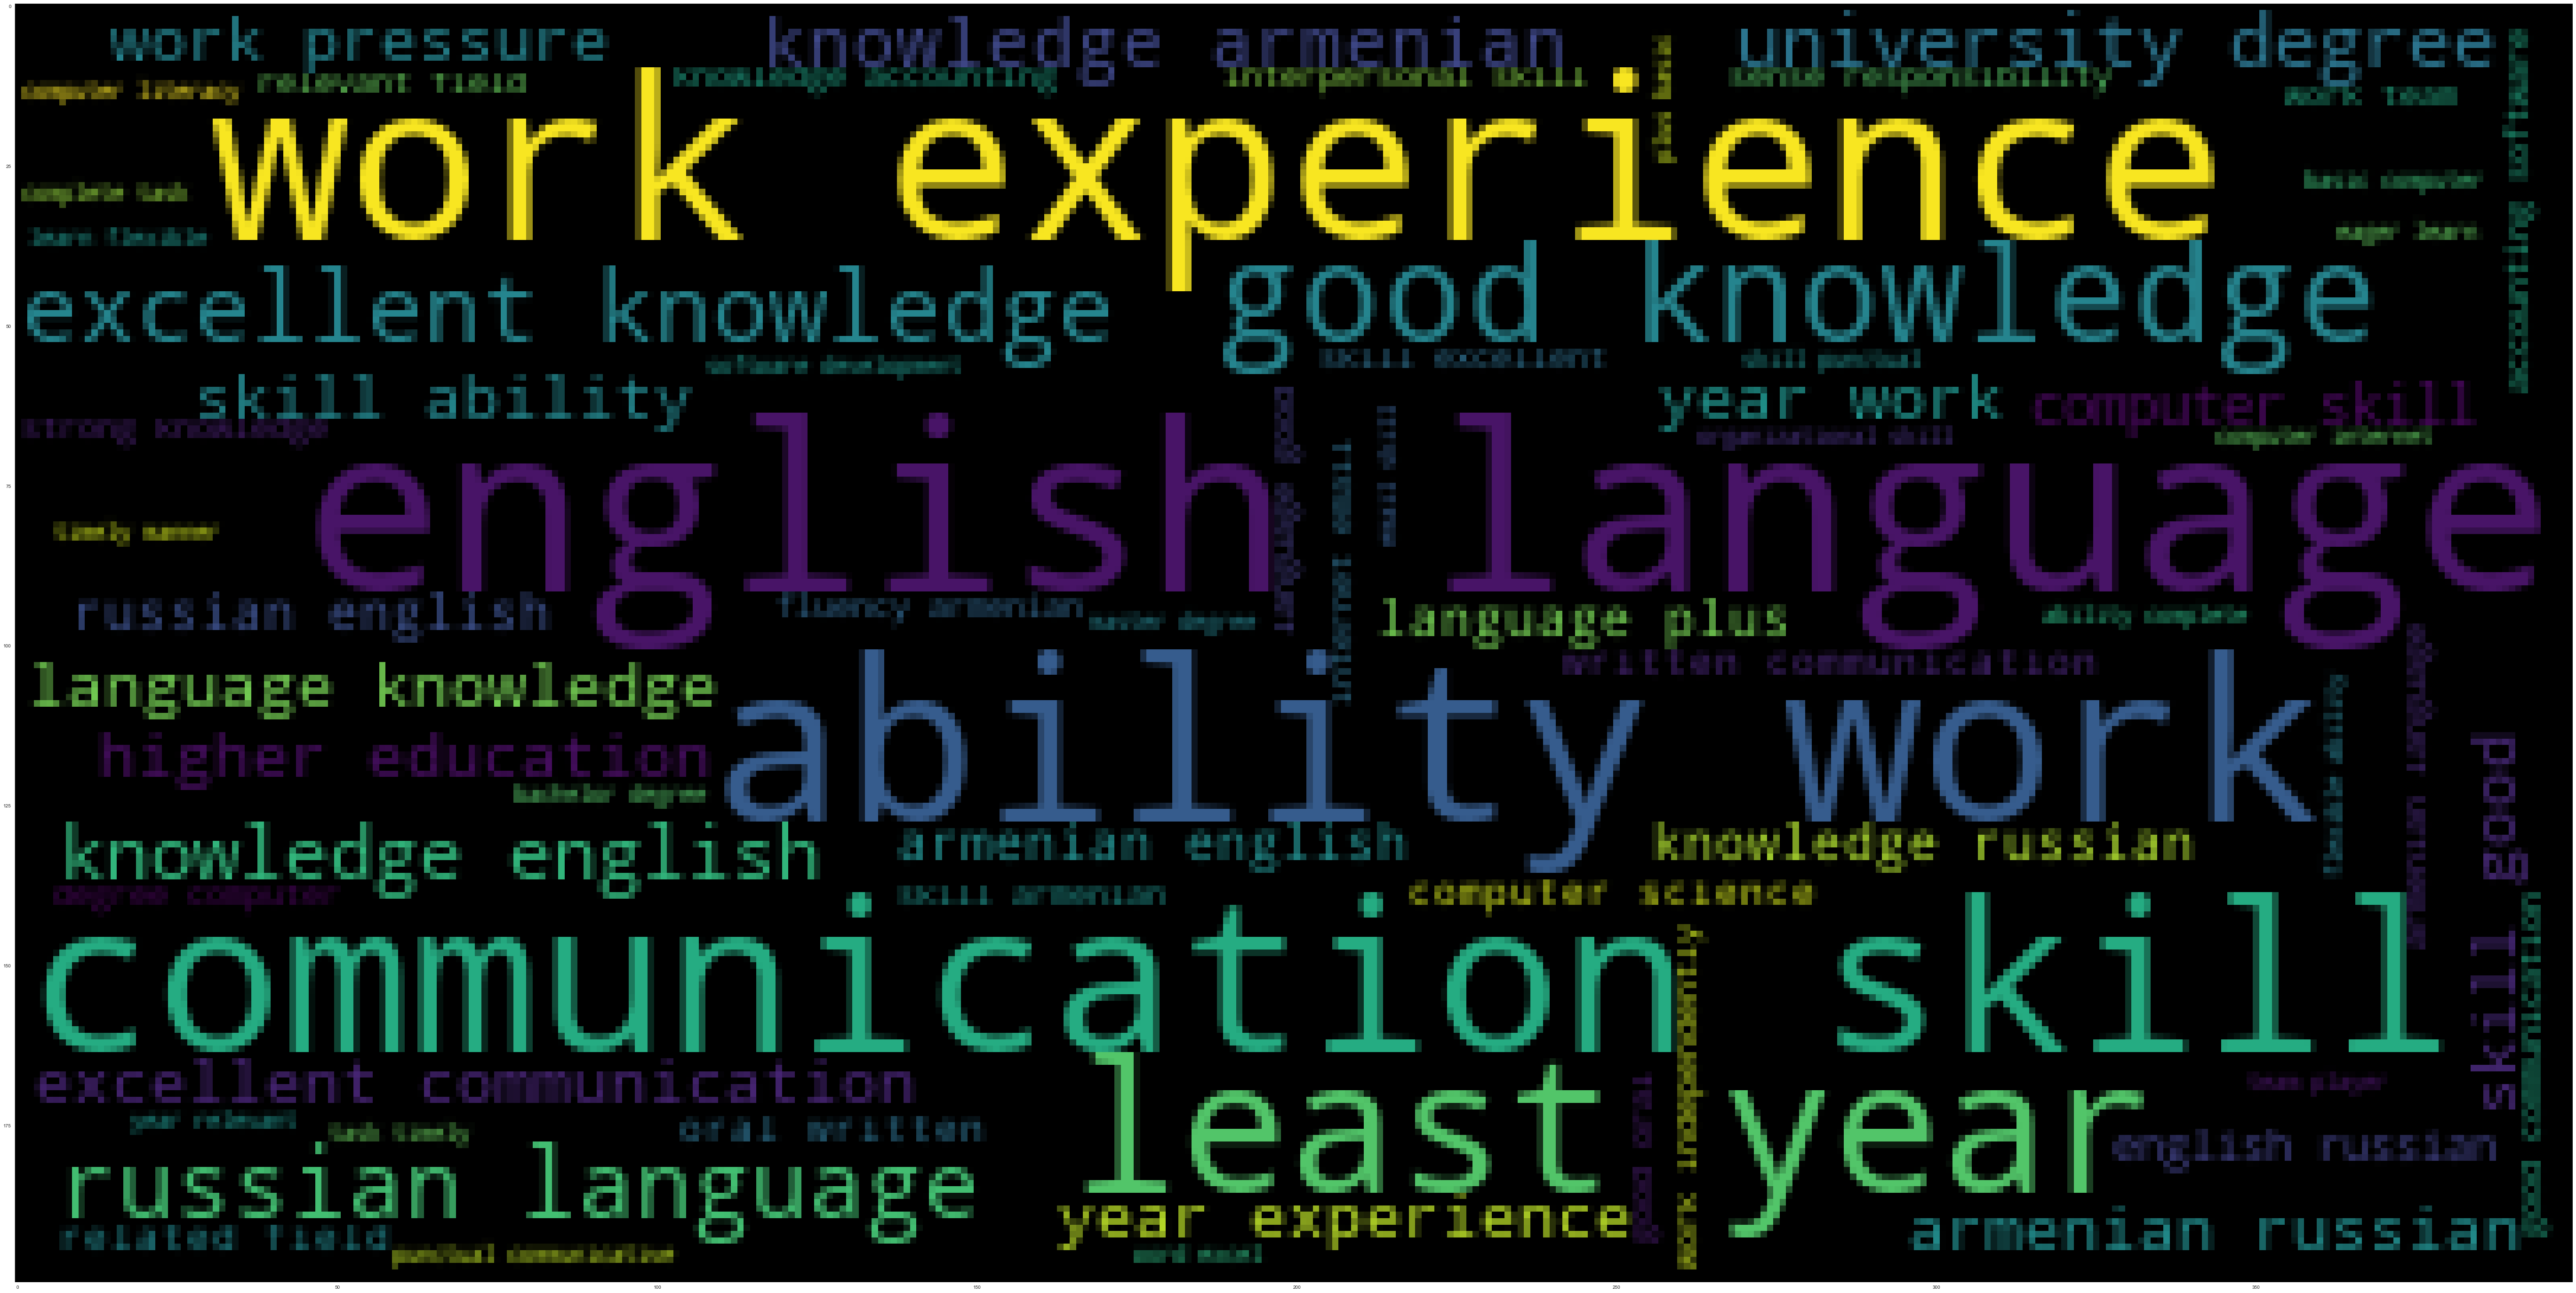

In [43]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Creating a user-define function to train the models : 

In [44]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors : 

In [45]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB for L1, Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB for L1, Count Vectors:  0.9567779960707269
NB  for L1, WordLevel TF-IDF:  0.9685658153241651
NB  for L1, N-Gram Vectors:  0.9174852652259332
NB for L1, CharLevel Vectors:  0.9390962671905697


In [46]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9567779960707269
LR  for L1, WordLevel TF-IDF:  0.9705304518664047
LR  for L1, N-Gram Vectors:  0.9449901768172888
LR for L1, CharLevel Vectors:  0.9823182711198428


In [47]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.9705304518664047
SVC  for L1, WordLevel TF-IDF:  0.9646365422396856
SVC  for L1, N-Gram Vectors:  0.9744597249508841
SVC for L1, CharLevel Vectors:  0.9901768172888016


In [48]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9666011787819253
LR  for L1, WordLevel TF-IDF:  0.9724950884086444
LR  for L1, N-Gram Vectors:  0.9587426326129665
LR for L1, CharLevel Vectors:  0.9744597249508841


In [49]:
#ANN
# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



#ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9764243614931237
LR  for L1, WordLevel TF-IDF:  0.9744597249508841
LR  for L1, N-Gram Vectors:  0.9744597249508841
LR for L1, CharLevel Vectors:  0.9882121807465619


### Unsupervised Learning : 

In [50]:
df = job_post_data[['RequiredQual']]

In [51]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

In [52]:
from nltk.util import ngrams

In [53]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)                # Remove punctuations
    text=text.lower()                                       # Convert text to lower
    return(text)

df['RequiredQual']=df['RequiredQual'].apply( lambda x: remove_punctuations(x))
df['RequiredQual'].head(5)

0    to perform this job successfully, an\nindividu...
1    - bachelor's degree; master's is preferred;\n-...
2    - degree in environmentally related field, or ...
3    - advanced degree in public health, social sci...
4    - university degree; economical background is ...
Name: RequiredQual, dtype: object

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(df['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [55]:
X_train = vectorizer.transform(df['RequiredQual'])
vocab = vectorizer.get_feature_names()

In [56]:
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'advanced',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'armenian russian english']

In [57]:
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [58]:
# Create a training data
X_train = vectorizer.transform(df['RequiredQual'])

In [59]:
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

In [60]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [61]:
range_n_clusters = list (range(4,11))

In [62]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 4, silhouette score is 0.031003759962790256
For n_clusters = 5, silhouette score is 0.03284237292745806
For n_clusters = 6, silhouette score is 0.032229980146470265
For n_clusters = 7, silhouette score is 0.0338389851825366
For n_clusters = 8, silhouette score is 0.03341323721637558
For n_clusters = 9, silhouette score is 0.028650629487867178
For n_clusters = 10, silhouette score is 0.03487118682447231


#### From the above scores, it is evident that the optimal number of clusters should be 10.

In [63]:
#kmeans model
model = KMeans(n_clusters=10, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [64]:
#Fit the mdoel defined above
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [65]:
# Getting the vocalbulary as well as cluster centers
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab) 

In [66]:
cluster_centers = np.array(res.cluster_centers_)

In [67]:
x=np.array((0.1,10,0.05,1.5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5 ]
[2 0 3 1]


array([ 81,  82,  72, 174,  95, 159,  29, 138,  26,  32, 183, 193, 136,
        92, 153,  34, 195, 175, 113, 200,   5, 154, 161,  65, 131,   9,
       119,  90,  47, 139, 141,   2,  74, 186, 210,  28, 178,  55,  57,
        91, 169, 177,  40,  53,  17,  68,  15,  18, 202, 103,  39, 206,
        93, 143,  63, 107,  60, 187, 197,  33,  42, 155, 179, 137, 188,
       147, 170, 194,  25,  20,  35,  10,  86,  97, 132, 102,  71, 173,
        78,  13,  54,  30, 158, 165, 111, 106,  66, 101, 108, 157,  96,
        75, 105,  87, 148, 167, 116,  70,   6,  16, 125,  36,  43, 182,
        77,  73, 166,  19, 104, 140, 135, 196,  69,  46, 207,  62, 211,
        94, 160,  76,  85, 142,  48, 145, 201,  38,  59, 156, 122, 110,
       126, 184, 209,   3,  12,  58, 130,  67, 189,   8,  61,  88, 146,
       115, 203, 127, 124, 204,   4, 109,  84,  80, 123, 181, 118, 192,
        37, 151,  45, 114, 185, 172, 144,  56, 120, 199, 129,  14, 112,
         1,  64, 191, 150,  99, 190,  27, 128,  44,  51, 171, 13

In [68]:
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [69]:
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'business', 'ability', 'management', 'strong', 'experience', 'marketing', 'communication', 'skills', 'excellent', 'knowledge'}
{'business', 'higher education', 'ability', 'education', 'management', 'strong', 'russian', 'experience', 'languages', 'marketing', 'communication', 'skills', 'higher', 'work', 'excellent', 'knowledge'}
{'ability', 'good', 'management', 'experience', 'communication', 'web', 'java', 'skills', 'software', 'work', 'plus', 'knowledge', 'business', 'education', 'russian', 'strong', 'development', 'languages', 'marketing', 'higher', 'excellent', 'higher education'}
{'ability', 'good', 'management', 'english language', 'experience', 'communication', 'web', 'knowledge english', 'java', 'skills', 'software', 'work', 'plus', 'knowledge', 'business', 'english', 'language', 'education', 'russian', 'strong', 'development', 'languages', 'degree', 'marketing', 'years', 'higher', 'excellent', 'higher education'}
{'ability', 'good', 'management', 'english language', 'experienc

In [70]:
words=list(words)

In [71]:
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [72]:
df.head()

,RequiredQual
0,"to perform this job successfully, an\nindividu..."
1,- bachelor's degree; master's is preferred;\n-...
2,"- degree in environmentally related field, or ..."
3,"- advanced degree in public health, social sci..."
4,- university degree; economical background is ...


In [73]:
#Number of observations in every cluster :

df['cluster'] = model.labels_
df.groupby('cluster').count()

,RequiredQual
cluster,
0,2222
1,2605
2,2014
3,2060
4,2551
5,2041
6,2384
7,791
8,855


In [74]:
df.head()

,RequiredQual,cluster
0,"to perform this job successfully, an\nindividu...",9
1,- bachelor's degree; master's is preferred;\n-...,6
2,"- degree in environmentally related field, or ...",5
3,"- advanced degree in public health, social sci...",5
4,- university degree; economical background is ...,7


### Job Similarity : 

In [101]:
df1=job_data[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

In [102]:
df1['JobDescription_token'] = df1['JobDescription'].map(word_tokenize)
df1['RequiredQual_token'] = df1['RequiredQual'].map(word_tokenize)
df1['JobRequirment_token'] = df1['JobRequirment'].map(word_tokenize)

In [103]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df1['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(df1['JobDescription'])
RequiredQual_tfidf = tfidf_model.fit_transform(df1['RequiredQual'])
JobRequirment_tfidf = tfidf_model.fit_transform(df1['JobRequirment'])

In [104]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

##### Jobs for Software Developer: 

In [106]:
df1.iloc[0]

jobpost                 Yerevan Brandy Company\nJOB TITLE:  Software D...
Title                                                  Software Developer
JobRequirment           - Rendering technical assistance to Database M...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - University degree; economical background is ...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, University, degree, ;, economical, backgro...
JobRequirment_token     [-, Rendering, technical, assistance, to, Data...
Name: 4, dtype: object

In [107]:
for index, score in find_similar_jobs_tfidf(0):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Cascade Capital Holdings CJSC\nTITLE:  Softwar...
Title                                                  Software Developer
JobRequirment           - Develop Database Applications in accordance ...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Higher education in a relevant field;\n- Goo...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Higher, education, in, a, relevant, field,...
JobRequirment_token     [-, Develop, Database, Applications, in, accor...
Name: 2545, dtype: object
SIMILARITY SCORE:  0.5942947085438506
jobpost                 Converse Bank CJSC\nTITLE:  Software Developer...
Title                                                  Software Developer
JobRequirment           - Develop and implement new information techno...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Higher education in In

##### Jobs for graphic designer : 

In [109]:
df1.iloc[1]

jobpost                 Xalt LLC\nJOB TITLE:  Graphic Designer\nPOSITI...
Title                                                    Graphic Designer
JobRequirment           Graphic Designer will be responsible for every...
JobDescription          The position of Graphic Designer (GD) demands ...
RequiredQual            As a GD you are creative, innovative and have\...
JobDescription_token    [The, position, of, Graphic, Designer, (, GD, ...
RequiredQual_token      [As, a, GD, you, are, creative, ,, innovative,...
JobRequirment_token     [Graphic, Designer, will, be, responsible, for...
Name: 19, dtype: object

In [110]:
for index, score in find_similar_jobs_tfidf(1):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 River Island\nTITLE:  Graphic Designer\nTERM: ...
Title                                                    Graphic Designer
JobRequirment           - Organize and be responsible for the accuracy...
JobDescription          River Island is seeking a Graphic Designer res...
RequiredQual            - Bachelor's degree in Graphic Design/ Graphic...
JobDescription_token    [River, Island, is, seeking, a, Graphic, Desig...
RequiredQual_token      [-, Bachelor, 's, degree, in, Graphic, Design/...
JobRequirment_token     [-, Organize, and, be, responsible, for, the, ...
Name: 11169, dtype: object
SIMILARITY SCORE:  0.4151430544558131
jobpost                 Nairisoft Inc.\nTITLE:  Graphic Designer\nTERM...
Title                                                    Graphic Designer
JobRequirment           - Design Web Application Interface and graphic...
JobDescription          We are looking for a highly qualified person w...
RequiredQual            - BS/ MS degree, prefer

##### Administrative Assistant : 

In [113]:
df1.iloc[2]

jobpost                 CUTS Centre for International Trade, Economics...
Title                                            Administrative Assistant
JobRequirment           - Responsible for managing office administrati...
JobDescription          This is an excellent opportunity for the right...
RequiredQual            - Fluency in spoken and written English; knowl...
JobDescription_token    [This, is, an, excellent, opportunity, for, th...
RequiredQual_token      [-, Fluency, in, spoken, and, written, English...
JobRequirment_token     [-, Responsible, for, managing, office, admini...
Name: 20, dtype: object

In [114]:
for index, score in find_similar_jobs_tfidf(2):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Casals & Associates, Inc.\nTITLE:  Administrat...
Title                                            Administrative Assistant
JobRequirment           - Coordinate meetings, conferences, and speaki...
JobDescription          Casals & Associates, Inc. is seeking a long-te...
RequiredQual            - Computer literacy;\n- Proficient use of Micr...
JobDescription_token    [Casals, &, Associates, ,, Inc., is, seeking, ...
RequiredQual_token      [-, Computer, literacy, ;, -, Proficient, use,...
JobRequirment_token     [-, Coordinate, meetings, ,, conferences, ,, a...
Name: 3981, dtype: object
SIMILARITY SCORE:  0.3702492363145726
jobpost                 Casals & Associates, Inc.\nTITLE:  Administrat...
Title                                            Administrative Assistant
JobRequirment           - Coordinate meetings, conferences, and speaki...
JobDescription          Casals & Associates, Inc. is seeking a long-te...
RequiredQual            - Education: University 

#### Using a pre-trained Word2Vec model : 

In [117]:
import spacy

In [119]:
# Original text - Title
doc1 = nlp(df1.iloc[0]['Title'])
doc2 = nlp(df1.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
Software Developer 

DOC2:
 Administrative Assistant 

 0.5588414905287881


In [120]:
# Original text - RequiredQual
doc1 = nlp(df1.iloc[0]['RequiredQual'])
doc2 = nlp(df1.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
- University degree; economical background is a plus;
- Excellent knowledge of Windows 2000 Server, Networking TCP/ IP
technologies, MS SQL 2000 Server, Visual Basic 6;
- At least 2 years of experience in database software development;
- Good knowledge of English.
REMUNERATION:  Will be commensurate with the norms accepted in the
Company. 

DOC2:
 - Fluency in spoken and written English; knowledge of other European
languages will be desirable;
- Wide-ranging administrative skills (knowledge of
accounting/bookkeeping work, knowledge of tax, social security and
accounting maters as per the British law, IT skills, etc);
- Ability to prioritise competing tasks, even under pressure, in a
methodical and systematic manner;
- Experience in working using her/his own initiative as well as working
in a team;
- Excellent inter-personal and communication skills;
- Excellent organising skills, including event organisation;
- An international outlook and interest in developmental issues;
- Comf

In [121]:
# removing stopwords and punctuations
doc1 = nlp(' '.join(df1.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df1.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
- University degree ; economical background is a plus ; - Excellent knowledge of Windows 2000 Server , Networking TCP/ IP technologies , MS SQL 2000 Server , Visual Basic 6 ; - At least 2 years of experience in database software development ; - Good knowledge of English . REMUNERATION : Will be commensurate with the norms accepted in the Company . 

DOC2:
 - Fluency in spoken and written English ; knowledge of other European languages will be desirable ; - Wide-ranging administrative skills ( knowledge of accounting/bookkeeping work , knowledge of tax , social security and accounting maters as per the British law , IT skills , etc ) ; - Ability to prioritise competing tasks , even under pressure , in a methodical and systematic manner ; - Experience in working using her/his own initiative as well as working in a team ; - Excellent inter-personal and communication skills ; - Excellent organising skills , including event organisation ; - An international outlook and interest in dev